In [1]:
# pip install -q numpy pandas matplotlib seaborn statsmodels scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing

# Linear Regression Analysis with Python

### **1. Introduction to Linear Regression**
- Explanation of the purpose and general form of linear regression.

### **2. Exploratory Data Analysis (EDA)**
- Overview of the data, checking for missing values, visualizing distributions, and relationships.

### **3. Linear Regression Assumptions**
- Linearity, independence, homoscedasticity, normality, and absence of multicollinearity.

### **4. How to Fit a Model**
- Splitting the data, fitting a linear regression model, and understanding its process.

### **5. What Numbers in the Results Mean**
- Interpreting coefficients, intercept, R-squared, and standard errors.

### **6. Why p-values and t-values Are Important**
- Understanding their role in determining the statistical significance of coefficients.

### **7. How to Interpret the Results**
- Drawing meaningful insights from coefficients and their significance.

### **8. Residual Analysis and Diagnostics**
- Validating model assumptions through residual plots and diagnostic tests.

### **9. Dealing with Violations of Assumptions**
- Corrective actions like data transformation, removing outliers, and using robust methods.

### **10. Multicollinearity**
- Detecting multicollinearity with Variance Inflation Factor (VIF) and addressing it.

### **11. Model Selection Techniques**
- Forward selection, backward elimination, and stepwise methods for choosing features.

### **12. Overfitting and Underfitting**
- Balancing model complexity to improve generalization and prevent poor performance.

### **13. Regularization Techniques**
- Ridge and Lasso regression to handle overfitting and improve feature selection.

### **14. Cross-Validation**
- Techniques like k-fold cross-validation to evaluate model performance.

### **15. Prediction and Confidence Intervals**
- Making predictions and understanding confidence and prediction intervals.

### **16. Influence and Leverage Points**
- Identifying and addressing influential points that may distort the model.


## 1. Introduction to Linear Regression

**Linear regression** is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to find a linear equation that best predicts the dependent variable based on the independent variables.

The general form of a linear regression model is:

In [3]:
from IPython.display import display, Math

display(Math(r"Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon"))

display(Math(r"Y \text{ is the dependent variable.}"))
display(Math(r"X_1, X_2, \dots, X_n \text{ are independent variables.}"))
display(Math(r"\beta_0 \text{ is the intercept.}"))
display(Math(r"\beta_1, \beta_2, \dots, \beta_n \text{ are coefficients.}"))
display(Math(r"\epsilon \text{ is the error term.}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


## 2. Exploratory Data Analysis (EDA)

Before fitting a linear regression model, it's important to understand the data. We'll use the California Housing dataset, which contains information about housing prices and related factors in California.

### 2.1 Load the Dataset

We'll load the dataset and convert it into a pandas DataFrame.


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

# Load the dataset
housing = fetch_california_housing()

# Create a DataFrame
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

# Display the first five rows
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



### 2.2 Data Overview

We'll examine the shape of the dataset and its summary statistics.


In [5]:

# Get dataset shape
print(f"Dataset shape: {data.shape}")

# Get summary statistics
data.describe()


Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



### 2.3 Check for Missing Values

It's essential to check if the dataset contains any missing values.


In [6]:

# Check for missing values
data.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


### 2.4 Visualize Distributions

We can visualize the distributions of the features to understand their spread and detect any anomalies.


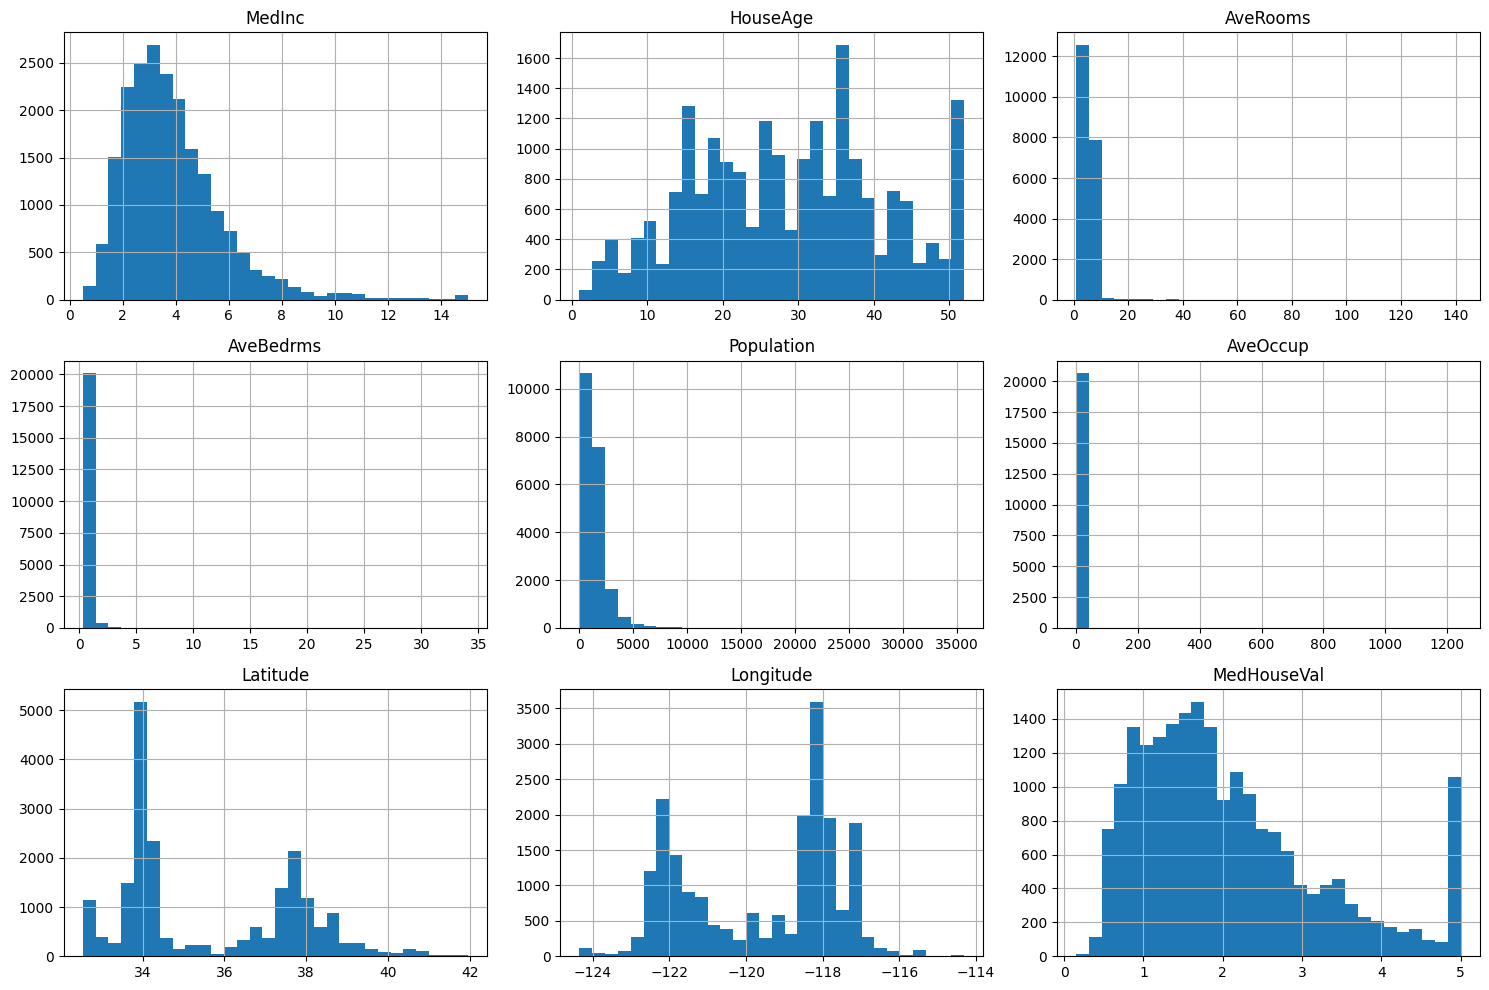

In [7]:

# Histograms of all features
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()



### 2.5 Correlation Matrix

A correlation matrix helps us understand the relationships between different variables.


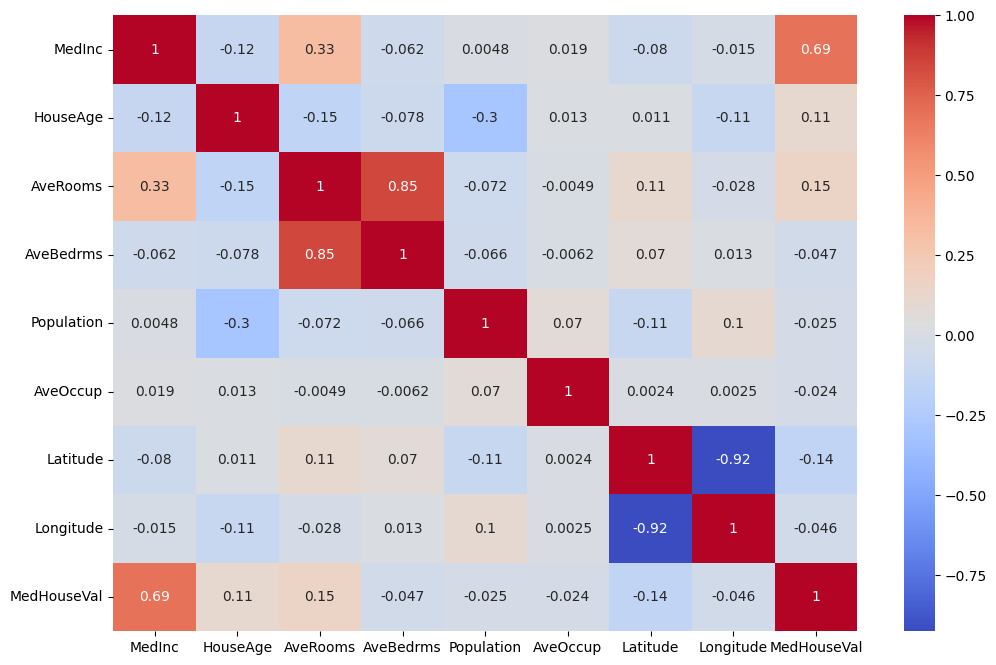

In [8]:

# Compute correlation matrix
corr_matrix = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



## 3. Linear Regression Assumptions

Before fitting a linear regression model, it's essential to understand and check the assumptions:

1. **Linearity**: The relationship between the independent and dependent variables should be linear.
2. **Independence**: Observations should be independent of each other.
3. **Homoscedasticity**: The residuals (errors) should have constant variance at all levels of \( X \).
4. **Normality**: The residuals should be approximately normally distributed.
5. **No Multicollinearity**: Independent variables should not be highly correlated with each other.

### 3.1 Linearity

We can create scatter plots to visualize the relationship between each independent variable and the dependent variable.


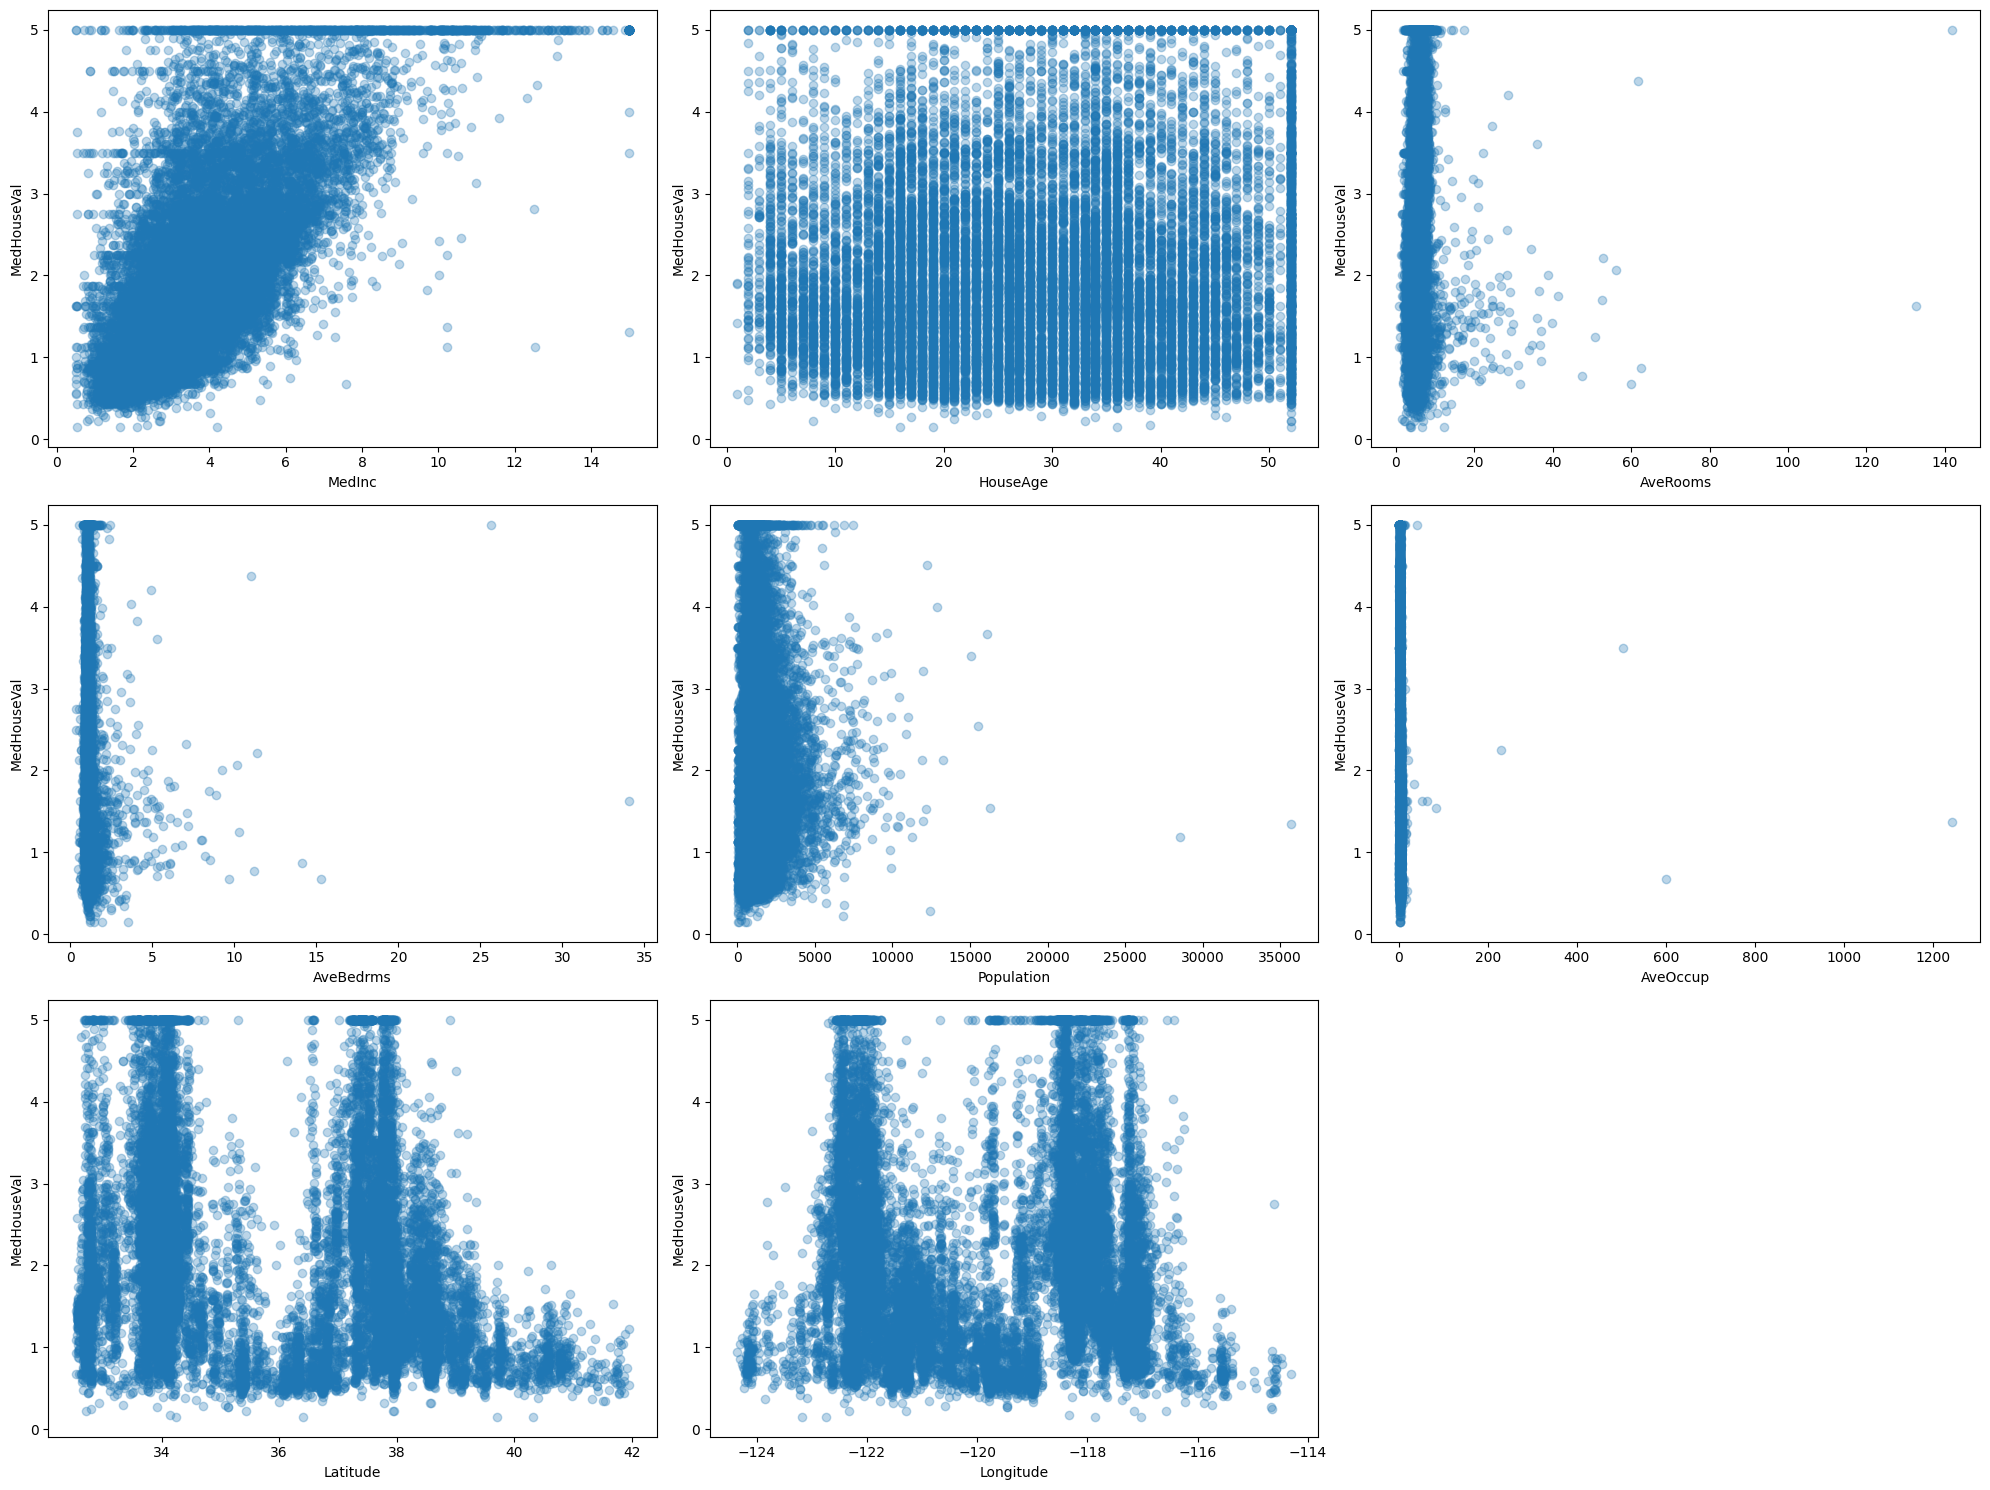

In [9]:

# Scatter plots
features = data.columns[:-1]
target = 'MedHouseVal'

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.scatter(data[feature], data[target], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel(target)
plt.tight_layout()
plt.show()



### 3.2 Multicollinearity

We can check for multicollinearity using the Variance Inflation Factor (VIF). High VIF values indicate multicollinearity.


In [10]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = data[features]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,Feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654



## 4. How to Fit a Model

We'll split the data into training and testing sets, then fit a linear regression model using the training data.

### 4.1 Split the Data

First, we divide the data into features and target variables, and then split it into training and testing sets.


In [11]:

from sklearn.model_selection import train_test_split

# Define features and target
X = data[features]
y = data[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### 4.2 Fit the Model

Next, we'll create a Linear Regression model and fit it using the training data.


In [12]:

from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


LinearRegression()


## 5. What Numbers in the Results Mean

After fitting the model, we can examine the coefficients, intercept, and evaluate the model's performance.

### 5.1 Coefficients and Intercept

The coefficients represent the change in the target variable for a one-unit increase in the feature, holding all other features constant.


In [13]:

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Create a DataFrame to display them
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print(f"Intercept: {intercept}")
coef_df


Intercept: -37.02327770606409


,Feature,Coefficient
0,MedInc,0.448675
1,HouseAge,0.009724
2,AveRooms,-0.123323
3,AveBedrms,0.783145
4,Population,-0.000002
5,AveOccup,-0.003526
6,Latitude,-0.419792
7,Longitude,-0.433708



### 5.2 Model Evaluation

We evaluate the model's performance using metrics like R-squared and Mean Squared Error (MSE).

#### 5.2.1 R-squared Score

The R-squared score indicates the proportion of the variance in the dependent variable that's predictable from the independent variables.


In [14]:

from sklearn.metrics import r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


R-squared Score: 0.5757877060324508



#### 5.2.2 Mean Squared Error (MSE)

The Mean Squared Error measures the average squared difference between observed and predicted values.


In [15]:

from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.5558915986952444


## 6. Why p-values and t-values Are Important
### Explanation
**p-values** and **t-values** help us determine the statistical significance of each coefficient in the regression model.

- **t-value**: Measures how many standard deviations the coefficient is away from zero.
- **p-value**: The probability of observing the data assuming the null hypothesis is true (null hypothesis: the coefficient is zero).

A small p-value (≤ 0.05) indicates strong evidence against the null hypothesis, meaning the coefficient is statistically significant.

Let's calculate the p-values and t-values for our regression model.

In [16]:
# Add a constant term (intercept) to the model
X_train_sm = sm.add_constant(X_train)

# Fit the model using OLS (Ordinary Least Squares)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# View the summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:10   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

## 7. How to Interpret the Results
### Explanation
From the regression summary:
- **Coefficients**: Estimated effect of each feature on the target variable.
- **Standard Error**: Measure of the variability of the coefficient estimate.
- **t-value**: Coefficient divided by its standard error. Larger absolute values indicate stronger evidence against the null hypothesis.
- **P>|t|**: p-value for the hypothesis test of whether the coefficient is zero.

### Example Interpretation
- For a feature with a positive and significant coefficient, increasing its value is associated with an increase in the target variable.
- For non-significant coefficients, the feature may not have a meaningful impact.

Let's display the coefficients and their p-values in a DataFrame for better interpretation.

In [17]:
coef_summary = pd.DataFrame({
    'Feature': model_sm.params.index,
    'Coefficient': model_sm.params.values,
    'p-value': model_sm.pvalues
})
coef_summary

,Feature,Coefficient,p-value
const,const,-37.023278,0.000000e+00
MedInc,MedInc,0.448675,0.000000e+00
HouseAge,HouseAge,0.009724,4.026550e-85
AveRooms,AveRooms,-0.123323,4.728144e-77
AveBedrms,AveBedrms,0.783145,1.060451e-120
Population,Population,-0.000002,6.989900e-01
AveOccup,AveOccup,-0.003526,4.260635e-13
Latitude,Latitude,-0.419792,0.000000e+00
Longitude,Longitude,-0.433708,0.000000e+00


## 8. Residual Analysis and Diagnostics
Residual analysis helps validate the assumptions of linear regression.
- Residuals should have constant variance (homoscedasticity).
- Residuals should be normally distributed.
- There should be no autocorrelation among residuals.

### Residual Plot
Residuals vs. Fitted Values plot helps check for patterns, which may indicate violations of assumptions.

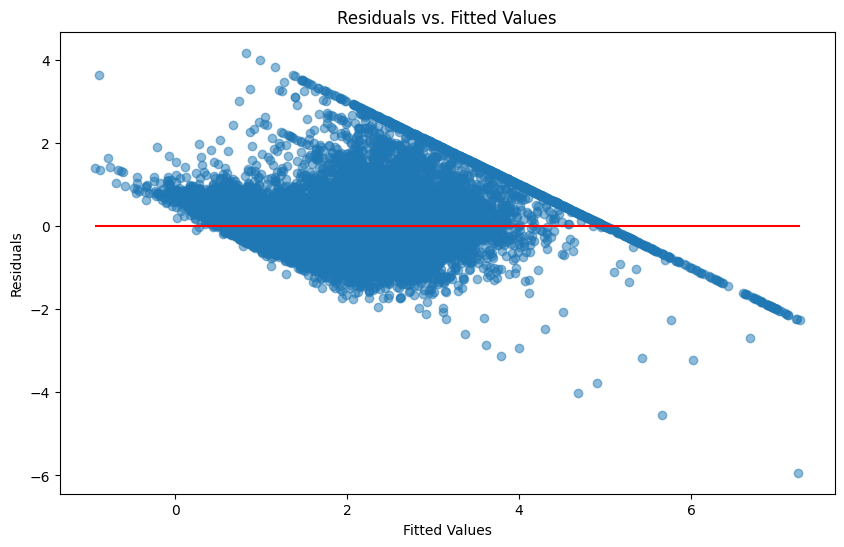

In [18]:
# Predicted values
y_train_pred = model_sm.predict(X_train_sm)

# Residuals
residuals = y_train - y_train_pred

# Plot residuals vs. fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_train_pred), max(y_train_pred), colors='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

### Normality of Residuals
Residuals should be approximately normally distributed. We can check this using a histogram and a QQ plot.

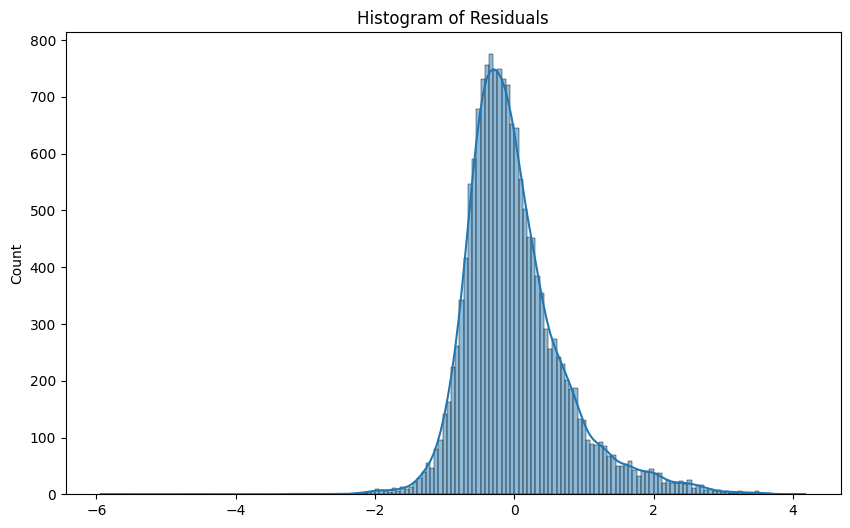

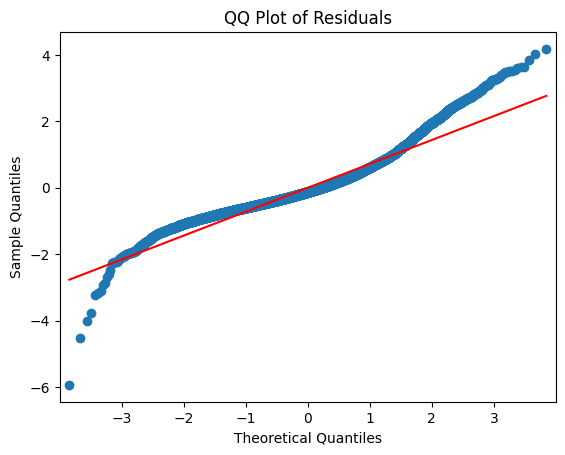

In [19]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# QQ-plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

### Homoscedasticity (Constant Variance)
We assume residuals have constant variance. If the spread of residuals increases or decreases with fitted values, it suggests heteroscedasticity.

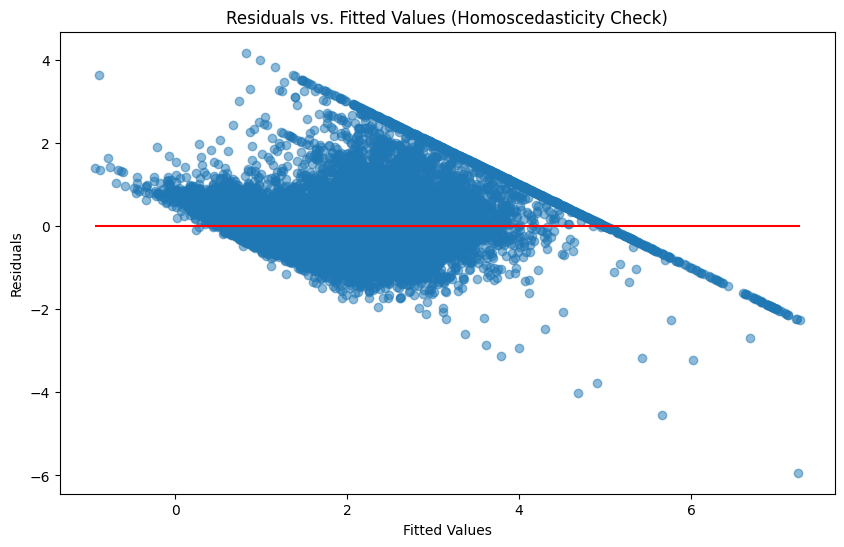

In [20]:
# Check for homoscedasticity visually
# Residuals vs. Fitted Values (again)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_train_pred), max(y_train_pred), colors='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Homoscedasticity Check)')
plt.show()

### Durbin-Watson Statistic
The Durbin-Watson statistic checks for autocorrelation in residuals. Values close to 2 indicate no autocorrelation.

In [21]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson statistic
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 1.9617928318577218


## 9. Dealing with Violations of Assumptions
If linear regression assumptions are violated, we can take corrective actions:

1. **Log Transformations**: Stabilize variance or make relationships linear.
2. **Removing Outliers**: Identify and handle influential points.

### Log Transformation
Let's log-transform the target variable to stabilize variance.

In [22]:
# Log transform the target variable
data['LogMedHouseVal'] = np.log(data['MedHouseVal'])

# Redefine target variable
y_log = data['LogMedHouseVal']

# Split the data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Add constant term
X_train_log_sm = sm.add_constant(X_train_log)

# Fit the model
model_log = sm.OLS(y_train_log, X_train_log_sm).fit()

# View summary
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:         LogMedHouseVal   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     3349.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:11   Log-Likelihood:                -6154.2
No. Observations:               16512   AIC:                         1.233e+04
Df Residuals:                   16503   BIC:                         1.240e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.2096      0.355    -68.106      0.0

### Removing Outliers
Outliers and influential points can distort the model. Let's calculate Cook's Distance to identify them.

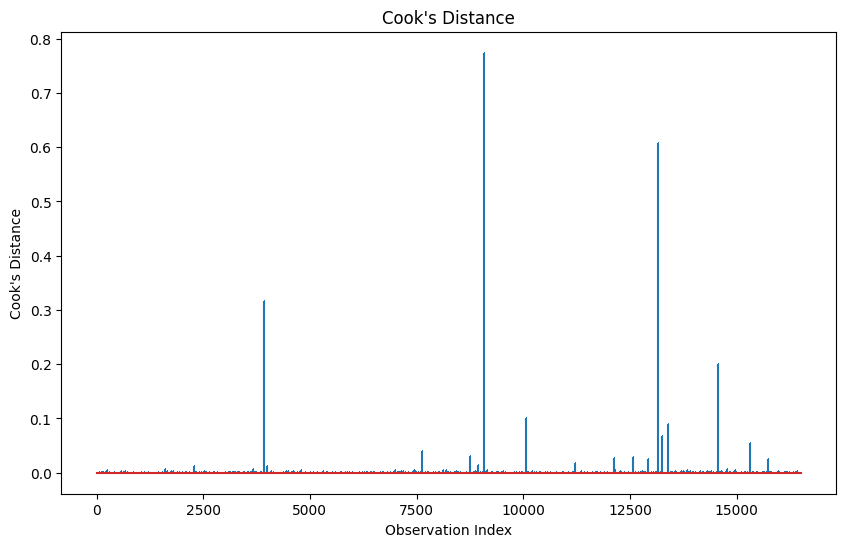

Influential points: [   63   100   120   127   151   155   177   200   245   258   288   293
   297   351   395   405   416   433   446   456   469   493   497   514
   578   592   612   621   636   678   722   749   839   847   852   853
   856   898   933   952   982   992  1038  1086  1113  1171  1202  1204
  1234  1270  1333  1420  1442  1448  1502  1525  1596  1597  1611  1628
  1647  1650  1730  1754  1784  1802  1879  1884  1923  1931  1935  1936
  1992  2000  2004  2007  2028  2043  2068  2072  2088  2105  2149  2157
  2261  2292  2295  2300  2302  2330  2346  2395  2427  2453  2481  2485
  2497  2498  2499  2509  2523  2533  2537  2544  2550  2558  2573  2574
  2575  2582  2647  2716  2733  2744  2771  2774  2812  2813  2831  2840
  2868  2875  2902  2984  3013  3019  3031  3082  3084  3092  3102  3133
  3150  3167  3170  3176  3184  3199  3229  3236  3246  3269  3291  3304
  3327  3328  3358  3393  3414  3432  3447  3486  3519  3522  3527  3528
  3537  3538  3550  3560  3572 

In [23]:
# Get influence measures
influence = model_sm.get_influence()

# Cook's distance
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=',')
plt.title("Cook's Distance")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

# Identify influential points
influential_points = np.where(cooks_d > 4 / len(cooks_d))[0]
print(f"Influential points: {influential_points}")

## 10. Multicollinearity
Multicollinearity occurs when independent variables are highly correlated. This can make coefficient estimates unstable.

### Variance Inflation Factor (VIF)
VIF measures how much the variance of a coefficient is inflated due to multicollinearity. A VIF > 5 or 10 indicates high multicollinearity.

In [24]:
# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant to features
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

vif_data

,Feature,VIF
0,const,17082.623698
1,MedInc,2.501295
2,HouseAge,1.241254
3,AveRooms,8.342786
4,AveBedrms,6.994995
5,Population,1.138125
6,AveOccup,1.008324
7,Latitude,9.297624
8,Longitude,8.962263


### Addressing Multicollinearity
Options to address multicollinearity:
- Remove highly correlated features.
- Combine correlated features.
- Use dimensionality reduction techniques like PCA.

## 11. Model Selection Techniques
Model selection involves choosing the most relevant variables for the model.

### Forward Selection
Start with no variables and add one at a time based on statistical significance.

In [25]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while initial_features:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# Apply forward selection
best_features = forward_selection(X_train, y_train)
print(f"Selected features: {best_features}")

Selected features: ['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


### Backward Elimination
Start with all variables and remove one at a time based on statistical significance.

In [26]:
def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while features:
        model = sm.OLS(target, sm.add_constant(data[features])).fit()
        p_values = model.pvalues.iloc[1:]  # Exclude intercept
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

# Apply backward elimination
selected_features = backward_elimination(X_train, y_train)
print(f"Selected features: {selected_features}")

Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


### Comparing Models
After selecting features, we evaluate the model's performance to ensure it generalizes well.

In [27]:
# Model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit model
model_selected = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()

# Evaluate model
y_pred_selected = model_selected.predict(sm.add_constant(X_test_selected))
from sklearn.metrics import r2_score
r2_selected = r2_score(y_test, y_pred_selected)
print(f"R-squared for selected model: {r2_selected}")

R-squared for selected model: 0.5757407466176085


## 12. Overfitting and Underfitting
**Overfitting** occurs when a model learns the noise in the training data, performing well on training data but poorly on unseen data.
**Underfitting** occurs when a model is too simple and fails to capture the patterns in the data.

### Cross-Validation for Model Evaluation
We use cross-validation to evaluate a model's performance and detect overfitting or underfitting.

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Perform 5-fold cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R-squared scores: {cv_scores}")
print(f"Average CV R-squared: {cv_scores.mean()}")

Cross-Validation R-squared scores: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
Average CV R-squared: 0.6114839952560993


## 13. Regularization Techniques
Regularization adds a penalty to the loss function to prevent overfitting. Two common techniques are:

- **Ridge Regression**: Penalizes large coefficients by adding an L2 penalty.
- **Lasso Regression**: Can shrink some coefficients to zero, performing variable selection.

### Ridge Regression

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define parameter grid
alpha_values = {'alpha': np.logspace(-3, 3, 7)}

# Perform Grid Search with Cross-Validation
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, alpha_values, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# Best alpha
print(f"Best alpha for Ridge: {ridge_cv.best_params_}")

# Evaluate model
y_pred_ridge = ridge_cv.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R-squared for Ridge Regression: {r2_ridge}")

Best alpha for Ridge: {'alpha': np.float64(10.0)}
R-squared for Ridge Regression: 0.5764371559180015


### Lasso Regression

In [30]:
from sklearn.linear_model import Lasso

# Perform Grid Search with Cross-Validation
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, alpha_values, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

# Best alpha
print(f"Best alpha for Lasso: {lasso_cv.best_params_}")

# Evaluate model
y_pred_lasso = lasso_cv.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R-squared for Lasso Regression: {r2_lasso}")

Best alpha for Lasso: {'alpha': np.float64(0.001)}
R-squared for Lasso Regression: 0.5773121026225015


## 14. Cross-Validation
Cross-validation is a technique to evaluate model performance on unseen data. It involves splitting the data into multiple folds and training/testing the model on different subsets.

### Example: 5-Fold Cross-Validation

In [31]:
# Perform 5-fold cross-validation for Ridge Regression
cv_scores_ridge = cross_val_score(ridge_cv.best_estimator_, X_train, y_train, cv=5, scoring='r2')
print(f"Ridge Regression CV R-squared scores: {cv_scores_ridge}")
print(f"Average CV R-squared for Ridge: {cv_scores_ridge.mean()}")

# Perform 5-fold cross-validation for Lasso Regression
cv_scores_lasso = cross_val_score(lasso_cv.best_estimator_, X_train, y_train, cv=5, scoring='r2')
print(f"Lasso Regression CV R-squared scores: {cv_scores_lasso}")
print(f"Average CV R-squared for Lasso: {cv_scores_lasso.mean()}")

Ridge Regression CV R-squared scores: [0.62003421 0.61298894 0.61337869 0.61066602 0.60038811]
Average CV R-squared for Ridge: 0.6114911963572343
Lasso Regression CV R-squared scores: [0.61992165 0.61295211 0.61326462 0.61067532 0.60056656]
Average CV R-squared for Lasso: 0.6114760503819732


## 15. Prediction and Confidence Intervals
Prediction intervals provide a range of values for predictions with a specified level of confidence.
### Making Predictions and Generating Confidence Intervals

In [32]:
# Predict median house value for new data
new_data = X_test.iloc[0:5]  # Sample new data
predictions = model_sm.get_prediction(sm.add_constant(new_data))

# Summary frame with confidence intervals
pred_summary = predictions.summary_frame(alpha=0.05)
pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
20046,0.719123,0.010630,0.698288,0.739958,-0.692058,2.130303
3024,1.764017,0.008072,1.748195,1.779838,0.352901,3.175132
15663,2.709659,0.017551,2.675256,2.744061,1.298213,4.121105
20484,2.838926,0.010153,2.819024,2.858827,1.427759,4.250093
9814,2.604657,0.014300,2.576628,2.632687,1.193352,4.015962


### Interpretation
- **mean**: Predicted value.
- **mean_ci_lower**, **mean_ci_upper**: Confidence interval for the mean prediction.
- **obs_ci_lower**, **obs_ci_upper**: Prediction interval for individual predictions.

## 16. Influence and Leverage Points
Influence and leverage points can significantly impact the model.

- **Leverage Points**: Points far from the average of the independent variables.
- **Influential Points**: Points that heavily affect the model's coefficients.

### Leverage Plot

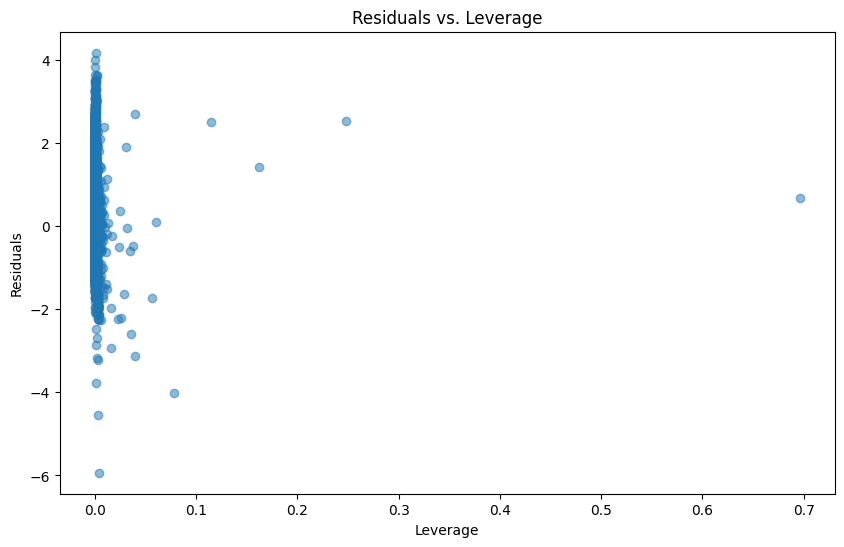

In [33]:
# Leverage values
leverage = influence.hat_matrix_diag

# Plot leverage vs. residuals
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Residuals vs. Leverage')
plt.show()